In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (10, 5)})
plt.style.use("fivethirtyeight")

In [41]:
data = pd.read_csv("data/diff_in_diff.csv")
data.head()

,sales,discount,age,gender,cust_state,tenure,profit,month
0,1153.28,0,25,O,MA,19,57.66,7
1,1978.13,0,26,M,MG,16,98.91,6
2,1095.70,0,26,W,RJ,20,54.78,2
3,2404.90,25,30,W,BA,18,95.24,6
4,1704.80,0,38,M,PB,15,85.24,4


Here's what we know.
- At some point in time, the e-commerce company started giving discount coupons to women on Mother’s Day.

- At some point in time, the company started testing more aggressive discounting in the state MG.

In DiD, we need a situation where, *at some point in time*, the treatment changes for one group but not the other. In this sense, it is similar to RDD, only now the discontinuity has to be over time.

In [42]:
data.isnull().sum().reset_index()

,index,0
0,sales,0
1,discount,0
2,age,0
3,gender,4965
4,cust_state,0
5,tenure,0
6,profit,0
7,month,0


In [43]:
data.dtypes

sales         float64
discount        int64
age             int64
gender         object
cust_state     object
tenure          int64
profit        float64
month           int64
dtype: object

In [44]:
# data_cleaned_gender = data[data["gender"]!= "O"]
data_by_gender = (data
                    .groupby(by=["gender", "month"])
                    ["discount"]
                    .mean()
                    .reset_index())
data_by_gender

,gender,month,discount
0,M,0,0.000000
1,M,1,0.000000
2,M,2,0.000000
3,M,3,0.000000
4,M,4,0.000000
5,M,5,0.000000
6,M,6,0.000000
7,M,7,0.000000
8,M,8,0.000000
9,M,9,0.000000


<Axes: xlabel='month', ylabel='discount'>

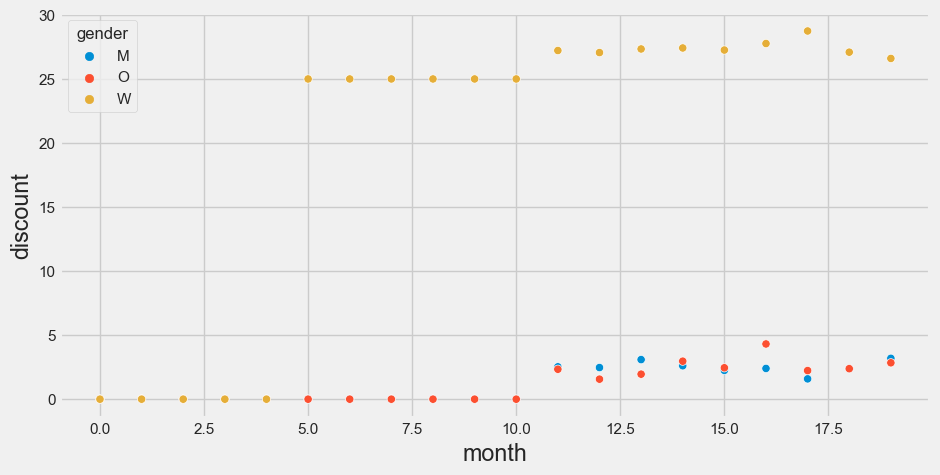

In [45]:
sns.scatterplot(
    data=data_by_gender,
    x="month",
    y="discount",
    hue="gender",
)

There is a sharp increase in discount for women at month 5. This aligns with what we know about the Mother's day discount.

In [50]:
data_by_state = (data
                    .groupby(["cust_state", "month"])
                    [["discount", "profit"]]
                    .mean()
                    .reset_index())
data_by_state

,cust_state,month,discount,profit
0,AC,0,0.000000,42.190000
1,AC,1,0.000000,42.866000
2,AC,2,0.000000,43.717143
3,AC,3,0.000000,42.665455
4,AC,4,0.000000,38.514000
...,...,...,...,...
531,TO,15,18.750000,36.892500
532,TO,16,25.000000,40.995000
533,TO,17,12.500000,51.265000
534,TO,18,8.333333,48.150000


In [60]:
data_by_state.query("cust_state == 'MG'")

,cust_state,month,discount,profit
198,MG,0,0.000000,82.880526
199,MG,1,0.000000,81.962991
200,MG,2,0.000000,86.363167
201,MG,3,0.000000,91.137815
202,MG,4,0.000000,94.415371
203,MG,5,11.510264,94.492962
204,MG,6,10.829493,97.832780
205,MG,7,10.947987,99.716309
206,MG,8,11.398678,102.156211
207,MG,9,10.455975,106.442233


/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='discount'>

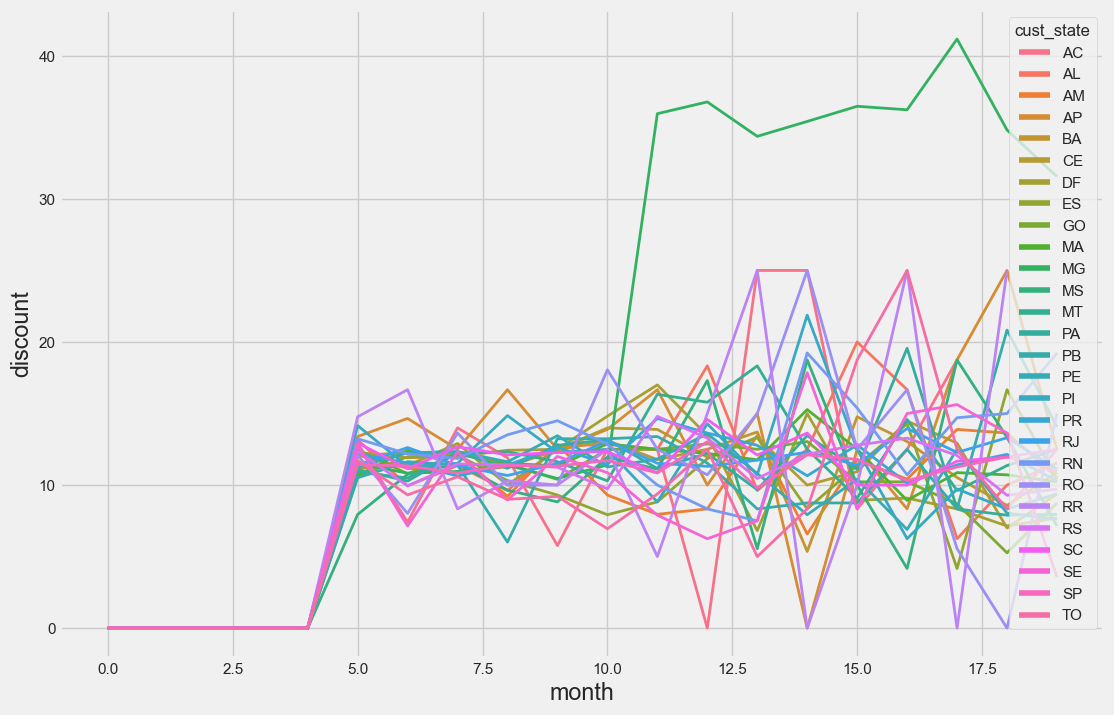

In [62]:
plt.figure(figsize=(12,8))
sns.lineplot(
    data=data_by_state,
    # data=data_by_state.query("cust_state == 'MG'"),
    x="month",
    y="discount",
    hue="cust_state",
    lw=2,
)

There is a spike in dicounts for state MG at month 10.